In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get stock data from Yahoo Finance
def get_stock_prices(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    return df


def create_stock_price_graph(df):
    """
    Function for creating a graph of price changes.
    Vertices: dates;
    Edges: connections between consecutive dates;
    Weights: price difference between the corresponding dates.
    """
    G = nx.Graph()
    for i in range(1, len(df)):
        G.add_edge(df.index[i-1], df.index[i], weight=abs(df["Close"].iloc[i] - df["Close"].iloc[i-1]))
    return G

In [3]:
# Set the stock symbol and the time interval for data retrieval
symbol = "BAC" # Bank of America
start_date = "2023-01-01"
end_date = "2024-03-01"

df = get_stock_prices(symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


- **Date**: The date of the trading session;
- **Open**: The opening price of the stock at the beginning of the trading session;
- **High**: The highest price of the stock during the trading session;
- **Low**: The lowest price of the stock during the trading session;
- **Close**: The closing price of the stock at the end of the trading session;
- **Adj Close**: The adjusted closing price of the stock (accounts for additional factors such as dividends, stock splits, etc.);
- **Volume**: The trading volume of the stock for the trading session.


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,33.230000,34.090000,33.209999,33.509998,32.270802,35221500
2023-01-04,33.900002,34.820000,33.830002,34.139999,32.877502,41998500
2023-01-05,33.919998,34.139999,33.580002,34.070000,32.810097,34177000
2023-01-06,34.090000,34.580002,33.540001,34.410000,33.137520,34068700
2023-01-09,34.750000,34.759998,33.709999,33.889999,32.636745,43818800
...,...,...,...,...,...,...
2024-02-23,33.730000,34.049999,33.490002,33.919998,33.682728,30586000
2024-02-26,33.790001,34.220001,33.529999,33.610001,33.374897,31129200
2024-02-27,33.730000,34.430000,33.709999,34.279999,34.040211,40536300


In [5]:
df.shape

(291, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291 entries, 2023-01-03 to 2024-02-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       291 non-null    float64
 1   High       291 non-null    float64
 2   Low        291 non-null    float64
 3   Close      291 non-null    float64
 4   Adj Close  291 non-null    float64
 5   Volume     291 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.9 KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,291.000000,291.000000,291.000000,291.000000,291.000000,2.910000e+02
mean,30.506254,30.841478,30.186564,30.530447,29.875383,4.724724e+07
std,2.780649,2.816048,2.798550,2.846453,2.781064,2.262702e+07
min,25.320000,25.650000,24.959999,25.170000,24.796028,1.581560e+07
25%,28.379999,28.650000,28.000000,28.335000,27.614389,3.423850e+07
50%,29.570000,29.870001,29.250000,29.540001,28.951979,4.168310e+07
75%,33.289999,33.669998,32.920000,33.430000,32.877502,5.168025e+07
max,36.410000,37.000000,36.340000,36.770000,35.410252,2.184033e+08


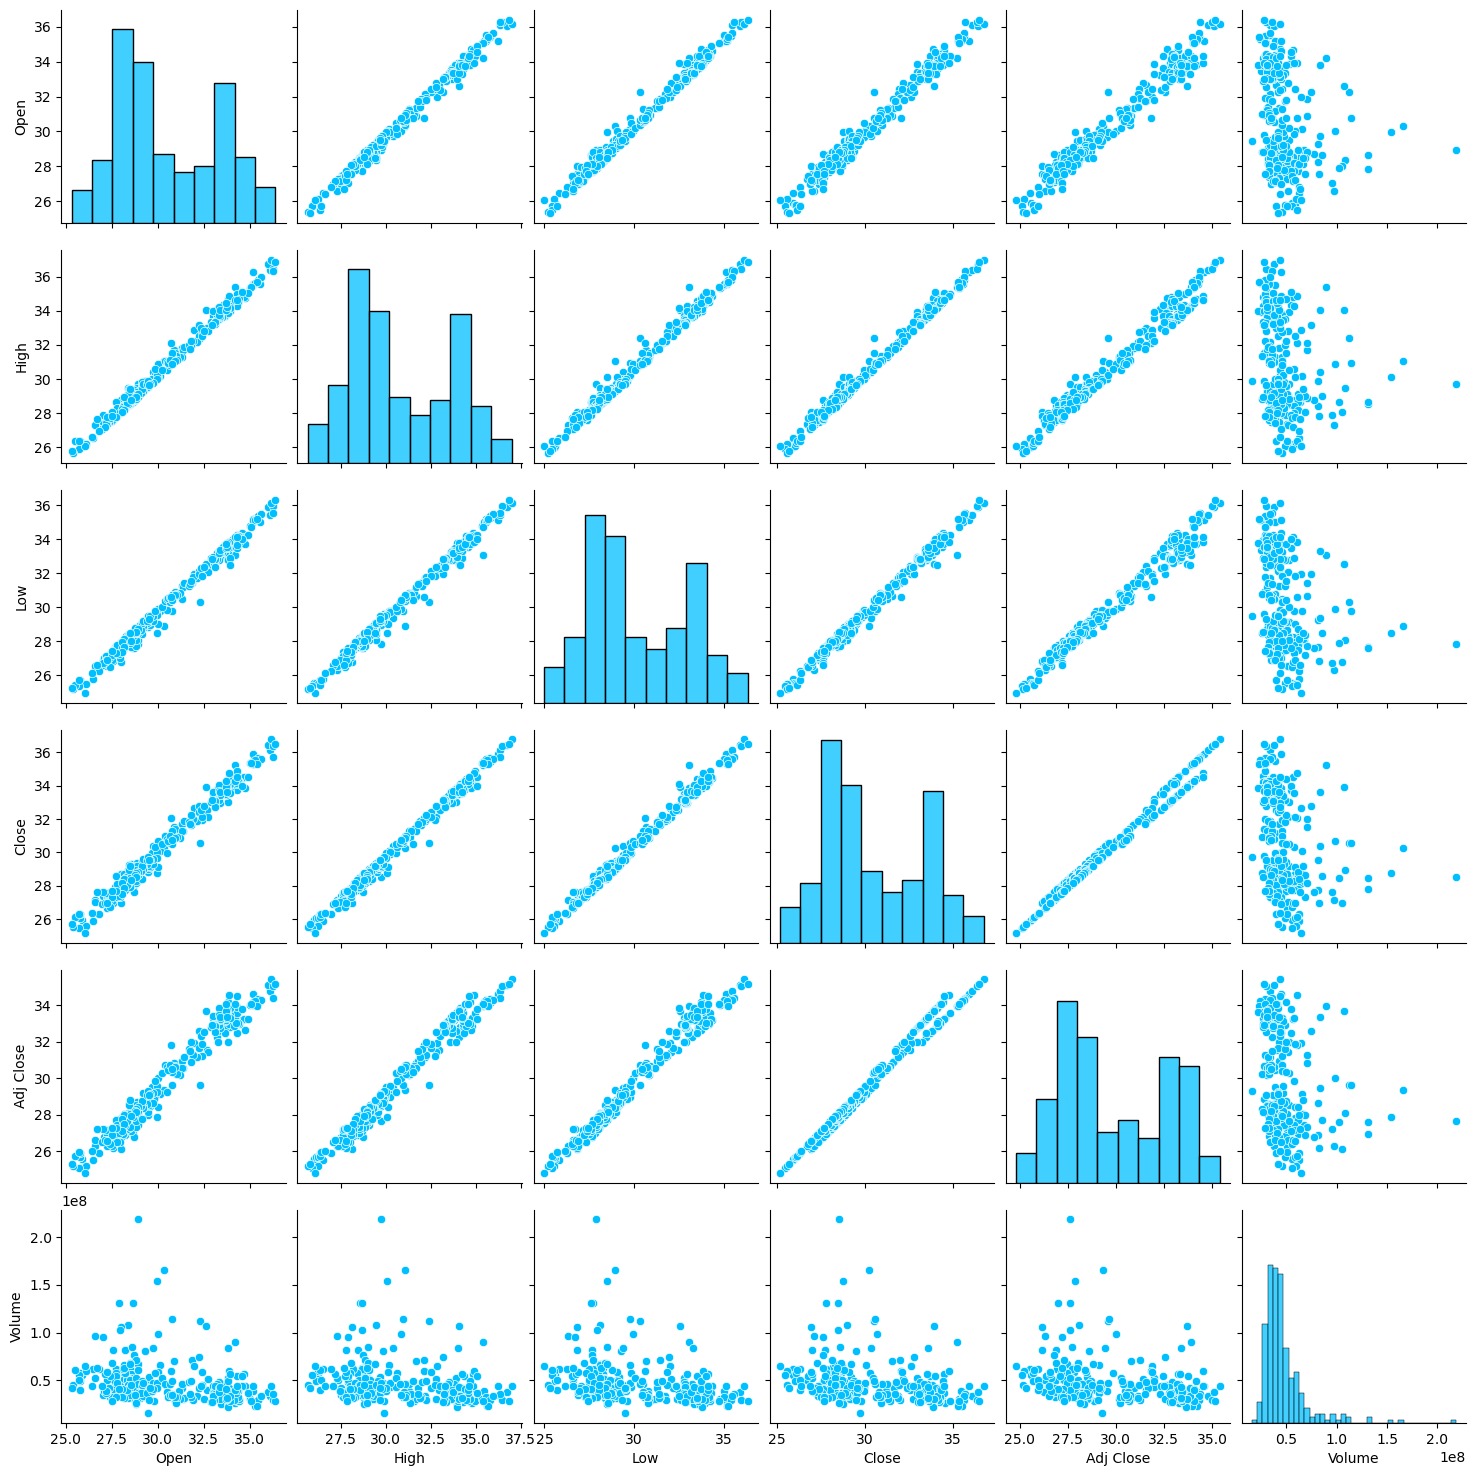

In [8]:
sns.pairplot(df, diag_kws={"color": "deepskyblue"}, plot_kws={"color": "deepskyblue"})

<Axes: ylabel='Date'>

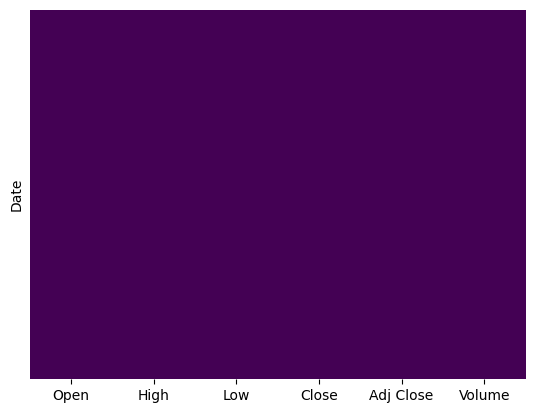

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

There are no missing values in the dataset

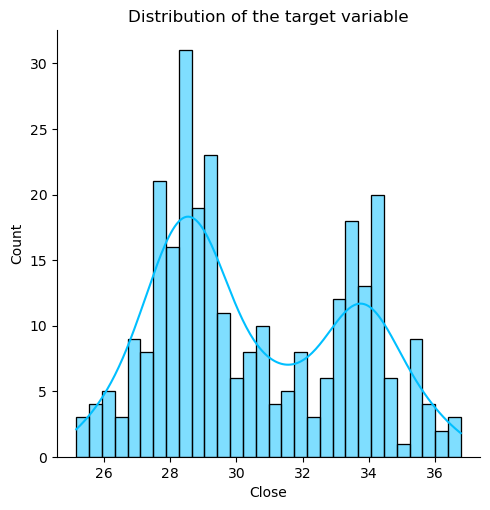

In [10]:
sns.displot(df["Close"], bins=30, kde=True, color="deepskyblue")
plt.title("Distribution of the target variable");

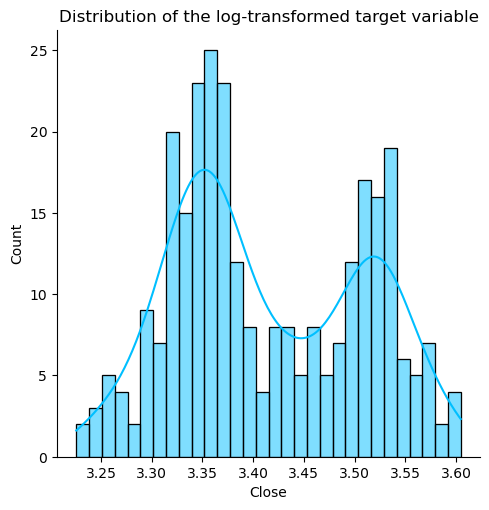

In [11]:
sns.displot(np.log(df["Close"]), bins=30, kde=True, color="deepskyblue")
plt.title("Distribution of the log-transformed target variable");

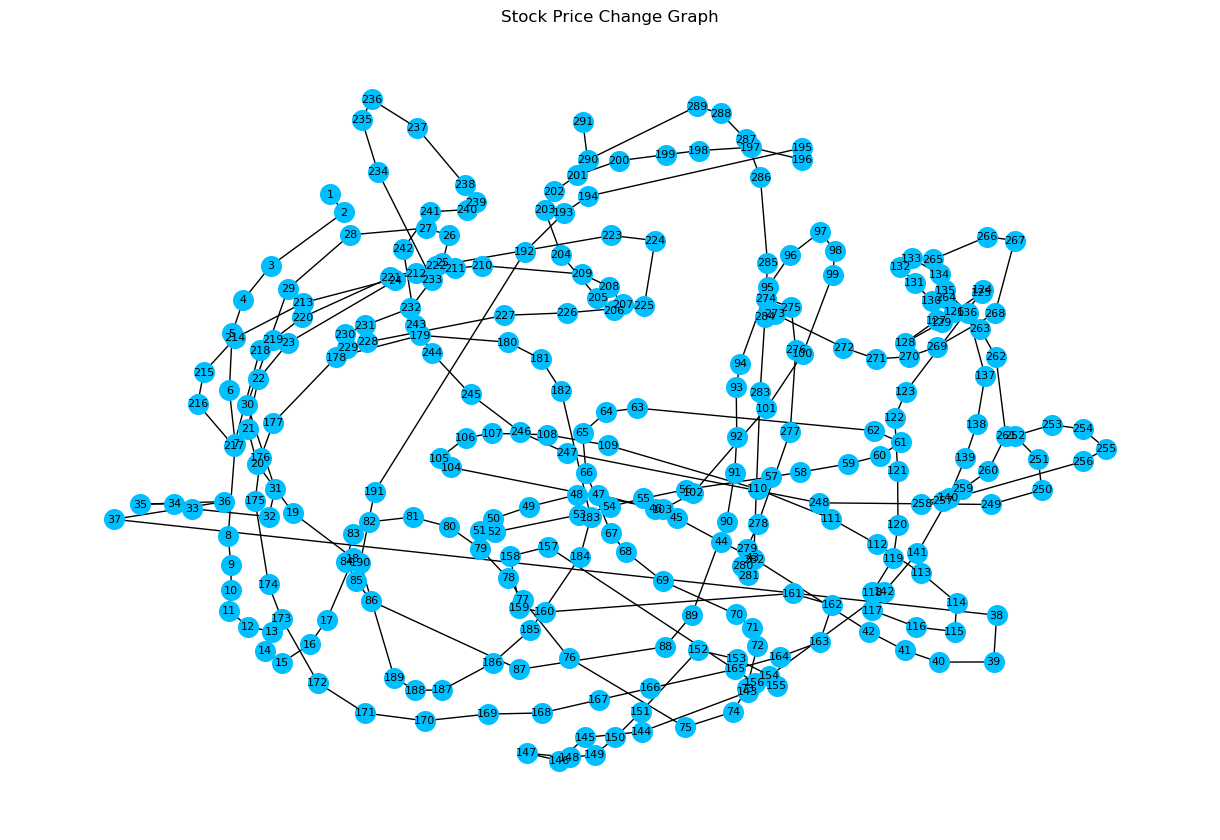

Vertex - Date Mapping:
--------------------------------------------------
Node 1: 2023-01-03
Node 2: 2023-01-04
Node 3: 2023-01-05
Node 4: 2023-01-06
Node 5: 2023-01-09
Node 6: 2023-01-10
Node 7: 2023-01-11
Node 8: 2023-01-12
Node 9: 2023-01-13
Node 10: 2023-01-17
Node 11: 2023-01-18
Node 12: 2023-01-19
Node 13: 2023-01-20
Node 14: 2023-01-23
Node 15: 2023-01-24
Node 16: 2023-01-25
Node 17: 2023-01-26
Node 18: 2023-01-27
Node 19: 2023-01-30
Node 20: 2023-01-31
Node 21: 2023-02-01
Node 22: 2023-02-02
Node 23: 2023-02-03
Node 24: 2023-02-06
Node 25: 2023-02-07
Node 26: 2023-02-08
Node 27: 2023-02-09
Node 28: 2023-02-10
Node 29: 2023-02-13
Node 30: 2023-02-14
Node 31: 2023-02-15
Node 32: 2023-02-16
Node 33: 2023-02-17
Node 34: 2023-02-21
Node 35: 2023-02-22
Node 36: 2023-02-23
Node 37: 2023-02-24
Node 38: 2023-02-27
Node 39: 2023-02-28
Node 40: 2023-03-01
Node 41: 2023-03-02
Node 42: 2023-03-03
Node 43: 2023-03-06
Node 44: 2023-03-07
Node 45: 2023-03-08
Node 46: 2023-03-09
Node 47: 2023-0

In [12]:
stock_price_graph = create_stock_price_graph(df)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(stock_price_graph, seed=42)
nx.draw(stock_price_graph, pos, with_labels=False, node_size=200, node_color="deepskyblue")
node_labels = {n: i for i, n in enumerate(stock_price_graph.nodes(), 1)}
nx.draw_networkx_labels(stock_price_graph, pos, labels=node_labels, font_size=8, font_color="black")
plt.title("Stock Price Change Graph", fontz)
plt.show()

print("Vertex - Date Mapping:")
print(50*"-")
for node, index in node_labels.items():
    print(f"Node {index}: {node.strftime('%Y-%m-%d')}")

print("\nGraph Statistics:")
print(50*"-")
print("Number of vertices:", stock_price_graph.number_of_nodes())
print("Number of edges:", stock_price_graph.number_of_edges())
print("Average degree:", np.mean([d for n, d in stock_price_graph.degree()]))
print("Density:", nx.density(stock_price_graph))
print("Average clustering coefficient:", nx.average_clustering(stock_price_graph))
print("Diameter:", nx.diameter(stock_price_graph))
print("Assortativity coefficient:", nx.degree_assortativity_coefficient(stock_price_graph))
print("Transitivity:", nx.transitivity(stock_price_graph))
print("Global efficiency:", nx.global_efficiency(stock_price_graph))
print("Average shortest path length:", nx.average_shortest_path_length(stock_price_graph))
print("Number of connected components:", nx.number_connected_components(stock_price_graph))
print("Size of largest connected component:", len(max(nx.connected_components(stock_price_graph), key=len)))

- **Average degree**: the average degree of the vertices is approximately 1.99, indicating that, on average, each vertex is connected to about two other vertices;
- **Density**: the density of the graph is approximately 0.00687, suggesting that the graph is sparse, with relatively few edges compared to the maximum possible number of edges;
- **Average clustering coefficient**: the average clustering coefficient is 0.0, which suggests that there are no clusters present in the graph;
- **Diameter**: the diameter of the graph is 290, meaning that the maximum distance between any two vertices is 290 units;
- **Assortativity coefficient**: the assortativity coefficient is close to zero (-0.00346), indicating that there is no clear tendency for high-degree vertices to be connected to other high-degree vertices;
- **Transitivity**: the transitivity is 0, indicating the absence of transitivity (triangles) in the graph;
- **Global efficiency**: the global efficiency is 0.036, suggesting that information transmission through the graph is relatively inefficient;
- **Average shortest path length**: the average shortest path length is approximately 97.33 units, meaning that, on average, it takes around 97 edges to reach one vertex from another;
- **Number of connected components**: there is only 1 connected component in the graph, meaning that every vertex is reachable from every other vertex;
- **Size of largest connected component**: the largest connected component contains 291 vertices, indicating that all vertices in the graph belong to the same component.
